In [ ]:
# train_dataset = SpectrogramDataset(audio_conf=audio_conf, manifest_filepath=args.train_manifest, 
#                                    labels=labels, normalize=True, augment=args.augment)
# test_dataset = SpectrogramDataset(audio_conf=audio_conf, manifest_filepath=args.val_manifest, 
#                                   labels=labels, normalize=True, augment=False)

# #train_loader = AudioDataLoader(train_dataset, num_workers=args.num_workers, batch_sampler=train_sampler)
# #test_loader = AudioDataLoader(test_dataset, batch_size=args.batch_size, num_workers=args.num_workers)

In [1]:
# import argparse
# import errno
# import json
# import os
# import time

import torch
from tqdm import tqdm
from torch.autograd import Variable
#from warpctc_pytorch import CTCLoss
from data.data_loader import AudioDataLoader, SpectrogramDataset, BucketingSampler
#from decoder import GreedyDecoder
#from model import DeepSpeech, supported_rnns
import torchaudio
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def load_audio(path):
    sound, _ = torchaudio.load(path)
    sound = sound.numpy()
    if len(sound.shape) > 1:
        if sound.shape[1] == 1:
            sound = sound.squeeze()
        else:
            sound = sound.mean(axis=1)  # multiple channels, average
    return sound

In [3]:
test_path = "/data/datasets/sound_datasets/pytorch_UrbanSound8K/trainset/street_music/101848-9-0-0.wav"

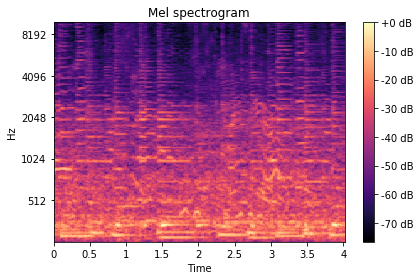

In [5]:
test_sound, sr = librosa.load(test_path)

n_mels = 256 # 512
S = librosa.feature.melspectrogram(y=test_sound, sr=sr, n_mels=n_mels,fmax=10000)

#plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                         y_axis='mel', fmax=10000,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [6]:
import time


In [22]:
t0 = time.time()
test_sound_1, sr = librosa.load(test_path)
tn = time.time()
print(tn-t0)

0.19141149520874023


In [30]:
t0 = time.time()
test_sound_2, _ = torchaudio.load(test_path)
sr = int(_/2)
tn = time.time()
print(tn-t0)

0.0024526119232177734


In [32]:
test_sound_1 == test_sound_2.numpy()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [46]:
test_sound_1.shape

(88200,)

In [47]:
test_sound_2.numpy().shape

(176400, 2)

In [54]:
test_sound_2.numpy()[:,0].size

176400

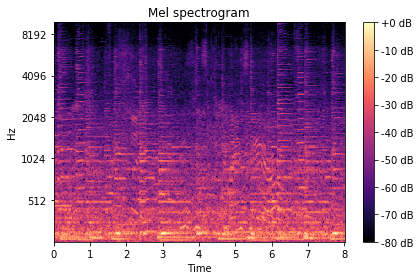

In [56]:
n_mels = 256 # 512
n_mels = 512
S = librosa.feature.melspectrogram(y=test_sound_2.numpy()[:,0], sr=sr, n_mels=n_mels,fmax=10000)

#plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                         y_axis='mel', fmax=10000,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [57]:
def generate_spectrogram(sound_tensor):
    n_mels = 512
    y=sound_tensor.numpy()[:,0]
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,fmax=10000)
    return S

In [58]:
test_spect = generate_spectrogram(test_sound_2)

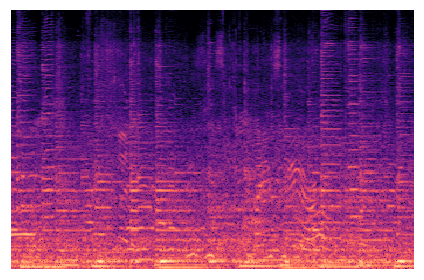

In [59]:
librosa.display.specshow(librosa.power_to_db(test_spect,ref=np.max),fmax=8000)
plt.axis('off') # Removes black border
plt.tight_layout()
plt.savefig("../../test_output_spectrogram.png",bbox_inches='tight',pad_inches=-0.05,transparency=True)

In [ ]:
def generate_spectrogram(input_sound, n_fft=None, hop_length=None, win_length=None, normalize=True):
#     D = librosa.stft(input_sound, n_fft=n_fft, hop_length=hop_length,
#                      win_length=win_length)
    D = librosa.stft(input_sound)
    spect, phase = librosa.magphase(D)
    # S = log(S+1)
    spect = np.log1p(spect)
    spect = torch.FloatTensor(spect)
    sr = len(librosa.samples_to_time(input_sound))
    S = librosa.feature.melspectrogram(y=input_sound, sr=sr, n_mels=512,fmax=10000)
    spect = torch.FloatTensor(S)
    if normalize:
        mean = spect.mean()
        std = spect.std()
        spect.add_(-mean)
        spect.div_(std)

    return spect

In [ ]:
test_sound, sr = librosa.load(test_path)

In [ ]:
def generate_spectrogram(input_sound):
    n_mels = 512
    sr = len(librosa.samples_to_time(input_sound))
    S = librosa.feature.melspectrogram(y=input_sound, sr=sr, n_mels=n_mels,fmax=10000)
    return S

In [ ]:
test_spect = generate_spectrogram(test_sound)

In [ ]:
librosa.display.specshow(librosa.power_to_db(test_spect,ref=np.max),fmax=8000)
plt.axis('off') # Removes black border
plt.tight_layout()

# Couldn't remove that last bit of border...
# extent = Bbox(np.array([[0,0],[435,291]])).transformed(fig.dpi_scale_trans.inverted())

# Removing the last bit of border with negative padding. 
plt.savefig("../../test_output_spectrogram.png",bbox_inches='tight',pad_inches=-0.05,transparency=True)

In [ ]:
extent

In [ ]:
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)